# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>


### Topic
<img src='https://miro.medium.com/max/1400/0*BB_ZgWthCTn6mJuo.jpg' width="700" />

>**Agenda:**
>- Basic setup
>- Exploration of Probability Threshold

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

In [2]:
# Read in data - see what we're dealing with
df = pd.read_csv('diabetes.csv')
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1
767,1,93,70,31,0,30.40,0.32,23,0


In [3]:
# Change column names
df.columns=['pregnancies','glucose','bp','skin','insulin','bmi','pedigree','age','label']

# Display summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
bp,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
skin,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
bmi,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
pedigree,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
label,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** label (1 if diabetic, 0 otherwise<br><br>

>[Go to Data Prep Outline](#data-prep)
---

> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>

In [4]:
# Let's clean up our data!

# remove any dupes
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

#df.describe()
#df.dtypes
#df.info()
#df.isnull().sum()


Number of records: 768
Number of records after dropping dupes: 768


>**Note:**<br>
No missing values or dupes

> **Initial Cleanup: Summary of Actions**<br><br>
No missing values or dupes

>[Go to Data Prep Outline](#data-prep)
---

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

> **Note:**<br>
Skipping for now

<AxesSubplot:xlabel='label', ylabel='Count'>

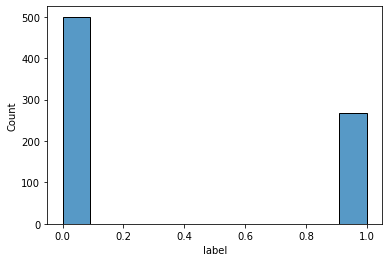

In [5]:
sns.histplot(df.label)

> **Outlier Detection: Notes/Summary of Actions**<br>
<br>
>**Note:**<br>
Text

>[Go to Data Prep Outline](#data-prep)
---

> **Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>

>**To Do:**<br>
> 1. Include everything<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>This is simple for now - may need to add more sampling complexity in future


In [7]:
target = ['label']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>SKIPPING THIS FOR NOW

In [8]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [Model1](#first-model)
- [X] [Model2](#second-model)
- [ ] [Model3](#third-model)


* [Go to Top](#table-of-content)

> **Model 1** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>Text

In [9]:
model = LogisticRegression()
model.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [10]:
# Let's look at some model artifacts
# make class predictions for the testing set
y_train_pred_class=model.predict(X_train)
y_test_pred_class = model.predict(X_test)

samples = 20 #using this below
# Put predicted probabilities in a dataframe - add column names
a = pd.DataFrame(model.predict_proba(X_test)[0:samples, :],columns=['p_not_diabetic(0)','p_diabetic(1)'])

# Append dataframe above to include class predictions
a['class_pred']=y_test_pred_class[0:samples]

# Append dataframe above to include actual class assignments
a['class_actual'] = y_test.iloc[0:samples,0].values

# Display dataframe
a

,p_not_diabetic(0),p_diabetic(1),class_pred,class_actual
0,0.85,0.15,0,0
1,0.91,0.09,0,0
2,0.90,0.10,0,0
3,0.63,0.37,0,0
4,0.77,0.23,0,1
5,0.16,0.84,1,1
6,0.47,0.53,1,1
7,0.64,0.36,0,1
8,0.11,0.89,1,1
9,0.78,0.22,0,0


In [11]:
metrics.accuracy_score(y_train, y_train_pred_class)

0.7541899441340782

In [12]:
metrics.accuracy_score(y_test, y_test_pred_class)

0.8138528138528138

In [13]:
# Use built in Accuracy calculation
print('Train Accuracy:', metrics.accuracy_score(y_train, y_train_pred_class).round(3))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred_class).round(3))

Train Accuracy: 0.754
Test Accuracy: 0.814


>**Model Summary:**<br>
>Is this good?<br>
>**But what about a baseline or 'naive' benchmark?**<br>
Let's compute a baseline using an understanding of the proportion of records in the original data that are assigned to each class
<br><br>




In [14]:
print('Count of not-diabetic and diabetic:')
print(y_train.value_counts())
print('\n')
print('%.2f percent of the people have diabetes' %(y_train.mean()*100))
print('%.2f percent of the people do not have diabetes' %(100-(y_train.mean()*100)))

Count of not-diabetic and diabetic:
label
0        348
1        189
dtype: int64


35.20 percent of the people have diabetes
64.80 percent of the people do not have diabetes


>**Question:**<br>
So, what's the best we could do with a "naive" model that simply assigns EVERY test record to the most prevalent class?<br>
**Answer?**<br> 64% <br><br>
Note that this estimate assumes that the proportion of records in each class will be the same in both the training and test set.  This may or may not be a good assumption

### Note:
> We the accuracy of our model might be influenced by our probability threshold.<br>
> Recall that the default threshold is 0.5<br>
> But we can change it!!!

1. Recall that we can extract the predicted probabilities from our trained model as follows...

In [15]:
# Let's build some functionality to loop through many different options for our 
# probability threshold

# Create list of threshold values
threshold = np.arange(0,1,0.05).tolist()

# Create empty lists to store metric values created within loop
Train_Accuracy = []
Test_Accuracy = []

for i in threshold:
    
    # Create class assignments given threshold value
    y_train_pred_class = (model.predict_proba(X_train)[:,1] >= i).astype(int)
    y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)
    
    # Create Metrics
    train_accuracy_value = metrics.accuracy_score(y_train, y_train_pred_class).round(2)
    test_accuracy_value = metrics.accuracy_score(y_test, y_test_pred_class).round(2)
    
    # Append lists
    Train_Accuracy.append(train_accuracy_value)
    Test_Accuracy.append(test_accuracy_value)

# Create dataframe
result = pd.DataFrame({"Threshold":threshold,
                       "Train_Accuracy": Train_Accuracy,
                       "Test_Accuracy": Test_Accuracy
                      })

# Let's look at our dataframe
result

,Threshold,Train_Accuracy,Test_Accuracy
0,0.00,0.35,0.34
1,0.05,0.41,0.41
2,0.10,0.51,0.52
3,0.15,0.60,0.64
4,0.20,0.68,0.67
5,0.25,0.71,0.68
6,0.30,0.74,0.73
7,0.35,0.75,0.74
8,0.40,0.76,0.75
9,0.45,0.77,0.81


In [16]:
# Create empty lists to store metric values created within loop
recall = []
FPR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)
    
    # Append lists with metric values
    recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
    FPR.append((metrics.confusion_matrix(y_test, y_test_pred_class)[0,1] / 
                (metrics.confusion_matrix(y_test, y_test_pred_class)[0,1] + 
                 metrics.confusion_matrix(y_test, y_test_pred_class)[0,0]) ).round(2))
    F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
    Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Let's look at our dataframe
result

,threshold,recall,FPR,F1_Score,Accuracy
0,0.00,1.00,1.00,0.51,0.34
1,0.05,1.00,0.90,0.54,0.41
2,0.10,1.00,0.73,0.59,0.52
3,0.15,0.99,0.55,0.65,0.64
4,0.20,0.91,0.45,0.65,0.67
5,0.25,0.83,0.39,0.64,0.68
6,0.30,0.82,0.32,0.68,0.73
7,0.35,0.73,0.25,0.66,0.74
8,0.40,0.68,0.21,0.65,0.75
9,0.45,0.68,0.13,0.71,0.81


>[Go to Machine Learning Outline](#ml-model)
---

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

* [Go to Top](#table-of-content)